In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data = pd.read_csv('small_store.csv')
data.head()

,Customer_Id,Products
0,1,bread
1,1,butter
2,1,eggs
3,1,milk
4,4,buns


In [3]:
data.tail()

,Customer_Id,Products
77,15,cheese
78,15,chips
79,15,mayo
80,15,mustard
81,15,soda


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 2 columns):
Customer_Id    82 non-null int64
Products       82 non-null object
dtypes: int64(1), object(1)
memory usage: 1.0+ KB


** Áp dụng Apriori

In [5]:
dataset = data.groupby('Customer_Id')['Products'].apply(list)
dataset

Customer_Id
1                           [bread, butter, eggs, milk]
2              [beer, bread, cheese, chips, mayo, soda]
3              [banana, bread, butter, cheese, oranges]
4                    [buns, chips, beer, mustard, soda]
5           [buns, chips, beer, mustard, pickels, soda]
6                [bread, butter, chocolate, eggs, milk]
7              [banana, chocolate, eggs, milk, oranges]
8     [beer, bread, buns, cheese, chips, chocolate, ...
9     [banana, beer, bread, cheese, milk, oranges, s...
10               [bread, butter, chocolate, eggs, milk]
11                                [banana, chips, soda]
12                 [bread, butter, eggs, milk, oranges]
13       [banana, beer, bread, cheese, butter, mustard]
14                          [bread, butter, eggs, milk]
15    [beer, bread, cheese, chips, mayo, mustard, soda]
Name: Products, dtype: object

In [6]:
count = 0
for i in dataset:
    count += len(i)
    
count

82

In [7]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

trsen = TransactionEncoder()
trans = trsen.fit(dataset).transform(dataset)

In [8]:
trans

array([[False, False,  True, False,  True, False, False, False,  True,
        False,  True, False, False, False, False],
       [False,  True,  True, False, False,  True,  True, False, False,
         True, False, False, False, False,  True],
       [ True, False,  True, False,  True,  True, False, False, False,
        False, False, False,  True, False, False],
       [False,  True, False,  True, False, False,  True, False, False,
        False, False,  True, False, False,  True],
       [False,  True, False,  True, False, False,  True, False, False,
        False, False,  True, False,  True,  True],
       [False, False,  True, False,  True, False, False,  True,  True,
        False,  True, False, False, False, False],
       [ True, False, False, False, False, False, False,  True,  True,
        False,  True, False,  True, False, False],
       [False,  True,  True,  True, False,  True,  True,  True, False,
         True, False,  True, False, False,  True],
       [ True,  True,  T

In [9]:
trsen.columns_

['banana',
 'beer',
 'bread',
 'buns',
 'butter',
 'cheese',
 'chips',
 'chocolate',
 'eggs',
 'mayo',
 'milk',
 'mustard',
 'oranges',
 'pickels',
 'soda']

In [10]:
off_data = pd.DataFrame(trans, columns = trsen.columns_)
off_data.head()

,banana,beer,bread,buns,butter,cheese,chips,chocolate,eggs,mayo,milk,mustard,oranges,pickels,soda
0,False,False,True,False,True,False,False,False,True,False,True,False,False,False,False
1,False,True,True,False,False,True,True,False,False,True,False,False,False,False,True
2,True,False,True,False,True,True,False,False,False,False,False,False,True,False,False
3,False,True,False,True,False,False,True,False,False,False,False,True,False,False,True
4,False,True,False,True,False,False,True,False,False,False,False,True,False,True,True


In [11]:
off_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 15 columns):
banana       15 non-null bool
beer         15 non-null bool
bread        15 non-null bool
buns         15 non-null bool
butter       15 non-null bool
cheese       15 non-null bool
chips        15 non-null bool
chocolate    15 non-null bool
eggs         15 non-null bool
mayo         15 non-null bool
milk         15 non-null bool
mustard      15 non-null bool
oranges      15 non-null bool
pickels      15 non-null bool
soda         15 non-null bool
dtypes: bool(15)
memory usage: 265.0 bytes


In [12]:
item_frequency = apriori(off_data, min_support=0.3, use_colnames = True)
item_frequency.head()

,support,itemsets
0,0.333333,(banana)
1,0.466667,(beer)
2,0.733333,(bread)
3,0.466667,(butter)
4,0.400000,(cheese)


In [13]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(item_frequency, metric = 'confidence', min_threshold=0.3)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(beer),(bread),0.466667,0.733333,0.333333,0.714286,0.974026,-0.008889,0.933333
1,(bread),(beer),0.733333,0.466667,0.333333,0.454545,0.974026,-0.008889,0.977778
2,(beer),(cheese),0.466667,0.400000,0.333333,0.714286,1.785714,0.146667,2.100000
3,(cheese),(beer),0.400000,0.466667,0.333333,0.833333,1.785714,0.146667,3.200000
4,(chips),(beer),0.400000,0.466667,0.333333,0.833333,1.785714,0.146667,3.200000
5,(beer),(chips),0.466667,0.400000,0.333333,0.714286,1.785714,0.146667,2.100000
6,(beer),(mustard),0.466667,0.333333,0.333333,0.714286,2.142857,0.177778,2.333333
7,(mustard),(beer),0.333333,0.466667,0.333333,1.000000,2.142857,0.177778,inf
8,(soda),(beer),0.466667,0.466667,0.400000,0.857143,1.836735,0.182222,3.733333
9,(beer),(soda),0.466667,0.466667,0.400000,0.857143,1.836735,0.182222,3.733333


In [14]:
association_rules(item_frequency, metric = 'lift', min_threshold=1.3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(beer),(cheese),0.466667,0.400000,0.333333,0.714286,1.785714,0.146667,2.100000
1,(cheese),(beer),0.400000,0.466667,0.333333,0.833333,1.785714,0.146667,3.200000
2,(chips),(beer),0.400000,0.466667,0.333333,0.833333,1.785714,0.146667,3.200000
3,(beer),(chips),0.466667,0.400000,0.333333,0.714286,1.785714,0.146667,2.100000
4,(beer),(mustard),0.466667,0.333333,0.333333,0.714286,2.142857,0.177778,2.333333
5,(mustard),(beer),0.333333,0.466667,0.333333,1.000000,2.142857,0.177778,inf
6,(soda),(beer),0.466667,0.466667,0.400000,0.857143,1.836735,0.182222,3.733333
7,(beer),(soda),0.466667,0.466667,0.400000,0.857143,1.836735,0.182222,3.733333
8,(butter),(bread),0.466667,0.733333,0.466667,1.000000,1.363636,0.124444,inf
9,(bread),(butter),0.733333,0.466667,0.466667,0.636364,1.363636,0.124444,1.466667


In [15]:
c = 0
for row in rules.iterrows():
    for check in row[1][0]:
        if check == 'soda':
            print('It contains soda !')
            c += 1
    if c == 1:
        break
if(c == 0):
    print('It does not contain soda in results !')

It contains soda !


==> Trong kết quả có chứa soda

In [16]:
for row in rules.iterrows():
    if 'soda' in row[1][0]:
        print(row)

(8, antecedents             (soda)
consequents             (beer)
antecedent support    0.466667
consequent support    0.466667
support                    0.4
confidence            0.857143
lift                   1.83673
leverage              0.182222
conviction             3.73333
Name: 8, dtype: object)
(22, antecedents             (soda)
consequents            (chips)
antecedent support    0.466667
consequent support         0.4
support                    0.4
confidence            0.857143
lift                   2.14286
leverage              0.213333
conviction                 4.2
Name: 22, dtype: object)
(32, antecedents           (soda, chips)
consequents                  (beer)
antecedent support              0.4
consequent support         0.466667
support                    0.333333
confidence                 0.833333
lift                        1.78571
leverage                   0.146667
conviction                      3.2
Name: 32, dtype: object)
(34, antecedents           (so

==> Soda khi được mua sẽ kết hợp với beer hoặc chips, cũng có thể 3 sản phẩm này kết hợp. Theo thực tiễn thì 3 sản phẩm này có thể kết hợp với nhau ==> Nâng cao hiệu quả bán hàng.

In [17]:
count_item = off_data.apply(pd.value_counts)
count_item

,banana,beer,bread,buns,butter,cheese,chips,chocolate,eggs,mayo,milk,mustard,oranges,pickels,soda
False,10,8,4,12,8,9,9,11,9,12,8,10,11,14,8
True,5,7,11,3,7,6,6,4,6,3,7,5,4,1,7


In [18]:
count_true = count_item.iloc[1,:]

In [19]:
count_true

banana        5
beer          7
bread        11
buns          3
butter        7
cheese        6
chips         6
chocolate     4
eggs          6
mayo          3
milk          7
mustard       5
oranges       4
pickels       1
soda          7
Name: True, dtype: int64

In [20]:
sort_true = count_true.sort_values(ascending = False)
sort_true

bread        11
soda          7
milk          7
butter        7
beer          7
eggs          6
chips         6
cheese        6
mustard       5
banana        5
oranges       4
chocolate     4
mayo          3
buns          3
pickels       1
Name: True, dtype: int64

In [21]:
top_3 = sort_true.iloc[:3]
top_3

bread    11
soda      7
milk      7
Name: True, dtype: int64

==> Top 3 are bread, soda and milk

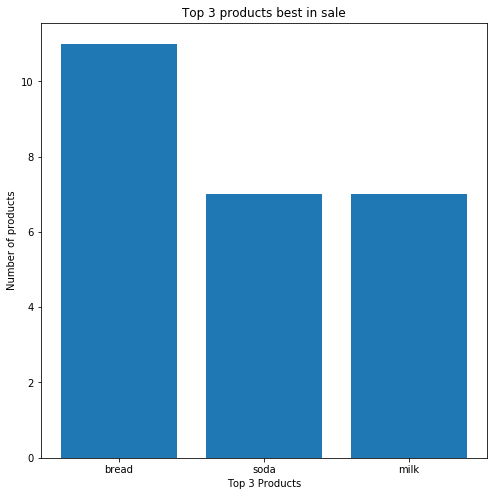

In [22]:
plt.figure(figsize = (8,8))
plt.bar(top_3.index, top_3, align = 'center')
plt.xlabel('Top 3 Products')
plt.ylabel('Number of products')
plt.title('Top 3 products best in sale')
plt.show()

** Dùng ECLAT: 

In [23]:
from collections import defaultdict

def tidlist(transactions):
    tI = defaultdict(set)
    for tid, t in enumerate(transactions):
        for item in t:
            tI[item].add(tid)
    return list(tI.items())

class IntersectAll:
    def __and__(self, other):
        return other
    
IntersectAll = IntersectAll()

In [24]:
tI = tidlist(list(dataset))

In [25]:
def eclat(items, minsup=0, minlen=1):
    frequent_itemsets = {(): IntersectAll}
    def recurse(items, prefix):
        while len(items) > 0:
            item, item_tidlist = items.pop()
            l = prefix + (item,) 
            new_tidlist = frequent_itemsets[prefix] & item_tidlist
            if len(new_tidlist) >= minsup: 
                frequent_itemsets[l] = new_tidlist


            new_items = []
            for new_item, _item_tidlist in items:
                new_item_tidlist = _item_tidlist & item_tidlist
                if len(new_item_tidlist) >= minsup:
                    new_items.append((new_item, new_item_tidlist))


            recurse(new_items, l)

    recurse(items.copy(), ())
    return {k: len(v) for k, v in frequent_itemsets.items() if len(k) >= minlen}

In [26]:
result = eclat(tI, minsup = 3, minlen = 3)
result

{('chocolate', 'milk', 'eggs'): 3,
 ('mustard', 'buns', 'soda'): 3,
 ('mustard', 'buns', 'soda', 'chips'): 3,
 ('mustard', 'buns', 'soda', 'chips', 'beer'): 3,
 ('mustard', 'buns', 'soda', 'beer'): 3,
 ('mustard', 'buns', 'chips'): 3,
 ('mustard', 'buns', 'chips', 'beer'): 3,
 ('mustard', 'buns', 'beer'): 3,
 ('mustard', 'soda', 'chips'): 4,
 ('mustard', 'soda', 'chips', 'beer'): 4,
 ('mustard', 'soda', 'beer'): 4,
 ('mustard', 'chips', 'beer'): 4,
 ('mustard', 'cheese', 'beer'): 3,
 ('mustard', 'cheese', 'beer', 'bread'): 3,
 ('mustard', 'cheese', 'bread'): 3,
 ('mustard', 'beer', 'bread'): 3,
 ('buns', 'soda', 'chips'): 3,
 ('buns', 'soda', 'chips', 'beer'): 3,
 ('buns', 'soda', 'beer'): 3,
 ('buns', 'chips', 'beer'): 3,
 ('banana', 'cheese', 'bread'): 3,
 ('soda', 'mayo', 'chips'): 3,
 ('soda', 'mayo', 'chips', 'cheese'): 3,
 ('soda', 'mayo', 'chips', 'cheese', 'beer'): 3,
 ('soda', 'mayo', 'chips', 'cheese', 'beer', 'bread'): 3,
 ('soda', 'mayo', 'chips', 'cheese', 'bread'): 3,
 ('

In [27]:
from collections import OrderedDict

result_sorted = OrderedDict(sorted(result.items(), key = lambda x:x[1]))
result_sorted

OrderedDict([(('chocolate', 'milk', 'eggs'), 3),
             (('mustard', 'buns', 'soda'), 3),
             (('mustard', 'buns', 'soda', 'chips'), 3),
             (('mustard', 'buns', 'soda', 'chips', 'beer'), 3),
             (('mustard', 'buns', 'soda', 'beer'), 3),
             (('mustard', 'buns', 'chips'), 3),
             (('mustard', 'buns', 'chips', 'beer'), 3),
             (('mustard', 'buns', 'beer'), 3),
             (('mustard', 'cheese', 'beer'), 3),
             (('mustard', 'cheese', 'beer', 'bread'), 3),
             (('mustard', 'cheese', 'bread'), 3),
             (('mustard', 'beer', 'bread'), 3),
             (('buns', 'soda', 'chips'), 3),
             (('buns', 'soda', 'chips', 'beer'), 3),
             (('buns', 'soda', 'beer'), 3),
             (('buns', 'chips', 'beer'), 3),
             (('banana', 'cheese', 'bread'), 3),
             (('soda', 'mayo', 'chips'), 3),
             (('soda', 'mayo', 'chips', 'cheese'), 3),
             (('soda', 'mayo', 'chips

In [28]:
result_sort = sorted((value, key) for (key, value) in result.items())
result_sort[:]

[(3, ('banana', 'cheese', 'bread')),
 (3, ('buns', 'chips', 'beer')),
 (3, ('buns', 'soda', 'beer')),
 (3, ('buns', 'soda', 'chips')),
 (3, ('buns', 'soda', 'chips', 'beer')),
 (3, ('chips', 'beer', 'bread')),
 (3, ('chips', 'cheese', 'beer')),
 (3, ('chips', 'cheese', 'beer', 'bread')),
 (3, ('chips', 'cheese', 'bread')),
 (3, ('chocolate', 'milk', 'eggs')),
 (3, ('mayo', 'beer', 'bread')),
 (3, ('mayo', 'cheese', 'beer')),
 (3, ('mayo', 'cheese', 'beer', 'bread')),
 (3, ('mayo', 'cheese', 'bread')),
 (3, ('mayo', 'chips', 'beer')),
 (3, ('mayo', 'chips', 'beer', 'bread')),
 (3, ('mayo', 'chips', 'bread')),
 (3, ('mayo', 'chips', 'cheese')),
 (3, ('mayo', 'chips', 'cheese', 'beer')),
 (3, ('mayo', 'chips', 'cheese', 'beer', 'bread')),
 (3, ('mayo', 'chips', 'cheese', 'bread')),
 (3, ('mustard', 'beer', 'bread')),
 (3, ('mustard', 'buns', 'beer')),
 (3, ('mustard', 'buns', 'chips')),
 (3, ('mustard', 'buns', 'chips', 'beer')),
 (3, ('mustard', 'buns', 'soda')),
 (3, ('mustard', 'buns',

In [29]:
for key, value in result.items():
    if 'soda' in key:
        print(key, ' : ', value)

('mustard', 'buns', 'soda')  :  3
('mustard', 'buns', 'soda', 'chips')  :  3
('mustard', 'buns', 'soda', 'chips', 'beer')  :  3
('mustard', 'buns', 'soda', 'beer')  :  3
('mustard', 'soda', 'chips')  :  4
('mustard', 'soda', 'chips', 'beer')  :  4
('mustard', 'soda', 'beer')  :  4
('buns', 'soda', 'chips')  :  3
('buns', 'soda', 'chips', 'beer')  :  3
('buns', 'soda', 'beer')  :  3
('soda', 'mayo', 'chips')  :  3
('soda', 'mayo', 'chips', 'cheese')  :  3
('soda', 'mayo', 'chips', 'cheese', 'beer')  :  3
('soda', 'mayo', 'chips', 'cheese', 'beer', 'bread')  :  3
('soda', 'mayo', 'chips', 'cheese', 'bread')  :  3
('soda', 'mayo', 'chips', 'beer')  :  3
('soda', 'mayo', 'chips', 'beer', 'bread')  :  3
('soda', 'mayo', 'chips', 'bread')  :  3
('soda', 'mayo', 'cheese')  :  3
('soda', 'mayo', 'cheese', 'beer')  :  3
('soda', 'mayo', 'cheese', 'beer', 'bread')  :  3
('soda', 'mayo', 'cheese', 'bread')  :  3
('soda', 'mayo', 'beer')  :  3
('soda', 'mayo', 'beer', 'bread')  :  3
('soda', 'mayo

==> Có soda. Và soda thường đi với các sản phẩm chips, beer, buns, bread, mayo. Nhưng soda đi với chips và beer là nhiều nhất. Có thể đặt những sản phẩm này cùng một kệ khi bán, hoặc áp dụng giảm giá để thu hút khách hàng.